#Libraries, directory and data

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [2]:
#libraries 
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [3]:
#load the data
df = pd.read_csv("salaries.csv")
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


#Analysing the data

In [4]:
#Summary statistics
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


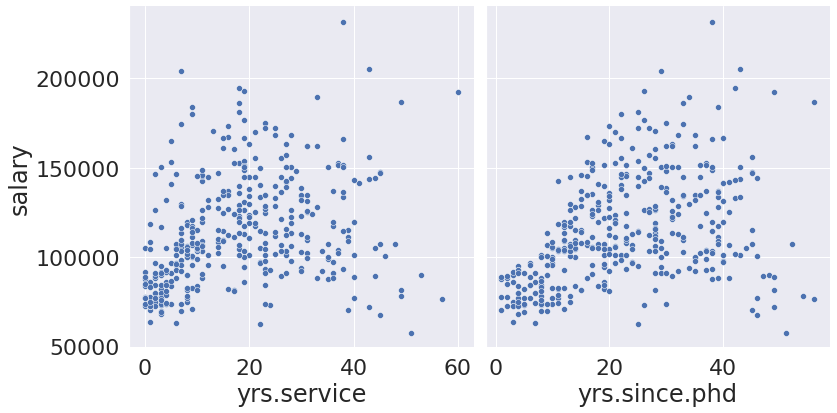

In [5]:
#plotting continuous IV against dependent variable
sns.set(font_scale = 2)
sns.pairplot(data = df,
             y_vars = ['salary'],
             x_vars = ['yrs.service', 'yrs.since.phd'],
             height = 6)

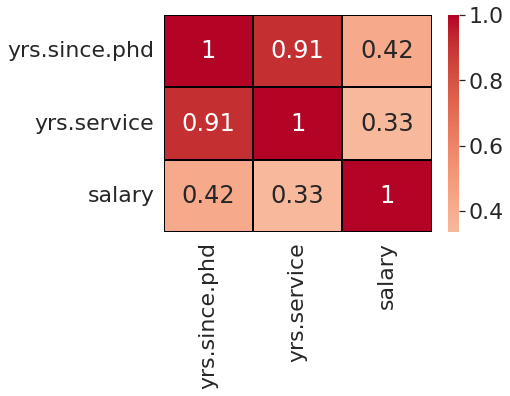

In [6]:
#Correlation matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

In [7]:
#Categorical variables
df['rank'].value_counts()
df.select_dtypes(include = 'object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [8]:
#For loop categorical variables
categorical = list(df.select_dtypes(include = 'object'))
for cat in categorical:
  print(df[cat].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [9]:
#look at data set
df.head(1)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750


In [10]:
#transform objects into dummies
df = pd.get_dummies(data = df, drop_first = True)
df.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1


#Multilinear regression preparation

In [11]:
#isolate X and Y
y = df.salary / 1000
X = df.drop(columns = ["salary", "yrs.service"])
X.head(1)

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1


In [12]:
#Add a constant
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1
2,1.0,4,1,0,1,1
3,1.0,45,0,1,1,1
4,1.0,40,0,1,1,1


In [13]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
X_train.head(2)

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1
287,1.0,2,1,0,0,1


#Multilinear Regression

In [14]:
#Multilinear regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           1.65e-41
Time:                        18:35:40   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

#Accuracy Assessment

In [15]:
#Predict
predictions = model.predict(X_test)
predictions[:4]

364    118.590061
30     134.868270
378    118.731635
188     99.876615
dtype: float64

In [16]:
#Accuracy assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", round(mean_absolute_error(y_test, predictions),1))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions)), 1))

MAE: 18.2
RMSE: 25.8
